    # Gradient Boosting Models
In this notebook, I present the functionalities of boosting trees. For this purpose we use an artificial data set.

## Loading Packages

In [1]:
# gradient boosting for regression in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot
import pandas as pd

## Defining Data Set

In [2]:
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

## Define and fit the model

In [3]:
# evaluate the model
model = GradientBoostingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -11.868 (1.143)


Fit the model on the whole data set

In [4]:
# fit the model on the whole dataset
model.fit(X, y)

GradientBoostingRegressor()

Now that we have the model, we can make a prediction on unseen data

In [5]:
# make a single prediction
row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: -301


## Grid Search
Boosting trees have at least three tuning parameters, the depth of the trees, the number of trees and the learning rate. The stopping criteria is important step for trees.

In [6]:
# defining the parameters
parameters= {'learning_rate':[0.1,0.01,0.001],
             'n_estimators':[100,1000,1500],
             'max_depth':[2,3,4,5],
             'min_samples_leaf':[10,30]}
# defining cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# defining the model
model = GradientBoostingRegressor()
# defining the grid serach (full grid here)
#Define the scoring
reg=GridSearchCV(model,parameters,scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1) # with n_jobs=-1 we run the computation in parallel
reg.fit(X=X, y=y)
# getting best parameters
print(reg.best_params_)

KeyboardInterrupt: 

Now that we have determined the best parameters, the model is trained on the whole data set with the optimal determind parameters from the considered grid. Not all possibilities can be tested.

In [ ]:
model = GradientBoostingRegressor(learning_rate=0.1,
                                  max_depth= 2,
                                  min_samples_leaf= 10,
                                  n_estimators= 1500)
model.fit(X=X, y=y)

GradientBoostingRegressor(max_depth=2, min_samples_leaf=10, n_estimators=1500)

Now we test the prediction of the new model

In [ ]:
# make a single prediction
row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: -324


## Variable importance

Text(0, 0.5, 'Feature Importance Score')

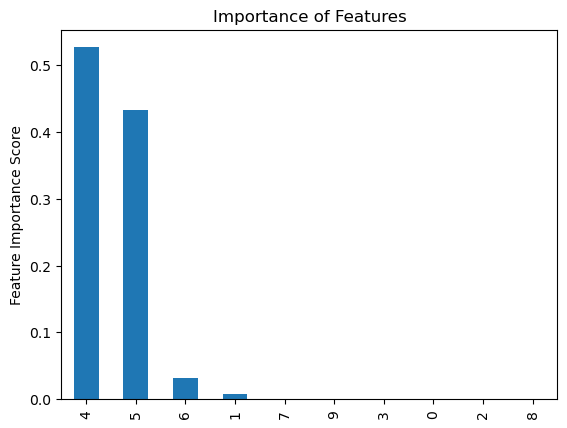

In [ ]:
feat_imp = pd.Series(model.feature_importances_).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
pyplot.ylabel('Feature Importance Score')

On this website, other implementations for boosting models can be found on the following website https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/.
